In [ ]:
#importing necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame output
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Normal Accuracy checking after removing 3% outlier

In [25]:
df = pd.read_csv('imdb_cleaned.csv')
df

,startYear,runtimeMinutes,totalCredits,numRegions,ratingCount,castNumber,companiesNumber,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Oceania,Continent Unknown,genre1,genre2,genre3,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame,rating_bin
0,1894,1,1,5,195,0,1,0,1,0,5,0,0,0,4,1,0,0,0,16787,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1895,1,3,7,1235,0,2,0,1,0,7,5,0,0,5,1,0,0,1,16787,16581,0,0,1,0,0,0,0,0,0,0,0,1
2,1895,1,3,8,1104,0,2,0,1,0,7,6,0,0,5,1,1,0,1,47408,16787,16581,0,1,0,0,0,0,0,0,0,0,1
3,1896,1,2,4,84,0,1,0,1,0,3,0,0,0,2,1,0,0,1,47408,16787,0,0,1,0,0,0,0,0,0,0,0,1
4,1898,1,5,1,220,3,2,0,1,0,3,1,0,0,0,1,0,0,0,16787,16581,2702,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144907,1993,96,11,1,11,0,2,1,1,0,1,0,0,0,0,0,1,0,0,16581,0,0,1,0,0,0,0,0,0,0,0,0,3
144908,2019,14,52,1,15,6,3,1,1,3,10,1,0,0,1,0,0,0,0,51745,16787,0,0,1,0,0,0,0,0,0,0,0,2
144909,2019,29,32,0,12,1,0,0,0,0,5,0,0,0,0,0,0,0,0,5726,0,0,0,0,1,0,0,0,0,0,0,0,1
144910,2011,10,15,0,10,7,0,3,1,0,1,0,0,0,0,0,0,0,0,47408,17855,17763,0,0,1,0,0,0,0,0,0,0,3


In [26]:
%%time

# Define features (X) and target (y)
X = df.drop(columns=['rating_bin'])  # Exclude target
y = df['rating_bin']  # Target variable

# Scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=50, metric='manhattan', weights = 'distance')  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.43
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.31      0.36      2483
           1       0.36      0.24      0.29      3708
           2       0.40      0.41      0.40      7269
           3       0.46      0.67      0.55      9566
           4       0.43      0.26      0.32      4969
           5       0.50      0.16      0.25       988

    accuracy                           0.43     28983
   macro avg       0.43      0.34      0.36     28983
weighted avg       0.42      0.43      0.41     28983

CPU times: total: 1min 46s
Wall time: 1min 1s


In [27]:
%%time
dtc = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter = 'random')# Initialize the Decision Tree Classifier
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3944726218817928

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.21      0.27      2483
           1       0.36      0.15      0.22      3708
           2       0.37      0.34      0.35      7269
           3       0.41      0.78      0.54      9566
           4       0.45      0.07      0.12      4969
           5       0.43      0.06      0.10       988

    accuracy                           0.39     28983
   macro avg       0.40      0.27      0.27     28983
weighted avg       0.40      0.39      0.34     28983

CPU times: total: 375 ms
Wall time: 395 ms


# Dataset making

In [3]:
df2 = pd.read_csv('imdb_with_outliers.csv')
df3 = pd.read_csv(r"D:\BOOKS\UNIPI\Sem 2\Data Mining 2\Project\imdb.csv")
df3

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,\N,1,0,2089,1,10,2,0,4,3,short,0,False,True,0,7,16,2092,['US'],"Documentary,Short",1,3,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0
1,Un bon bock,"(5, 6]",1892,\N,12,0,183,1,10,2,0,2,0,short,0,False,True,0,6,1,183,['FR'],"Animation,Short",0,0,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0
2,Chinese Opium Den,"(4, 5]",1894,\N,1,0,195,1,10,1,0,1,0,short,0,False,True,0,5,0,195,['US'],Short,0,1,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,\N,1,1,2237,1,10,3,0,4,2,short,0,False,True,0,6,20,2238,['US'],"Documentary,Short",1,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,\N,1,0,13115,1,10,12,0,11,16,short,0,False,True,0,21,66,13115,['FR'],"Documentary,Short",6,5,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,\N,96,0,11,1,10,0,0,11,0,movie,0,False,True,0,1,0,11,['CO'],Documentary,0,2,7.0,"['\\N', 'CO']",1,1,1,[],0
149527,Eco,"(6, 7]",2019,\N,14,0,15,1,10,4,1,52,1,short,3,False,True,0,1,0,15,['ES'],"Drama,Short",6,3,6.4,"['\\N', 'ES']",5,1,1,[],0
149528,Women Take Center Stage,"(5, 6]",2019,\N,\N,0,12,1,10,2,3,32,0,tvEpisode,0,False,True,0,0,0,12,NaN,Reality-TV,1,0,5.6,['\\N'],0,0,0,[],0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,\N,10,0,9,1,10,1,0,15,0,tvEpisode,0,False,True,0,0,0,10,NaN,"Adventure,Animation,Comedy",7,0,7.1,['\\N'],0,3,1,[],0


In [4]:
#making the new dataset for new classification
df2['averageRating'] = df3['averageRating']

# making new column with average rating
df2['ratingClass'] = pd.cut(
    df2['averageRating'],
    bins=[0, 4, 7, 10],
    labels=['low', 'medium', 'high'],
    include_lowest=True
)

df2

,startYear,runtimeMinutes,totalCredits,numRegions,ratingCount,castNumber,companiesNumber,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Oceania,Continent Unknown,genre1,genre2,genre3,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame,rating_bin,LOF_Score,t-SNE-1,t-SNE-2,ISF_Score,ABOD_Score,common_outlier,averageRating,ratingClass
0,1894,1,4,7,2092,1,3,0,1,0,11,19,1,0,5,1,0,0,0,16787,16581,0,0,1,0,0,0,0,0,0,0,0,1,-1,-58.228850,-88.766770,-1,1,-1,5.7,medium
1,1892,12,2,6,183,0,0,0,1,0,5,1,1,0,5,0,0,0,0,17855,16787,0,0,1,0,0,0,0,0,0,0,0,1,-1,-70.796220,-82.802270,-1,1,-1,5.4,medium
2,1894,1,1,5,195,0,1,0,1,0,5,0,0,0,4,1,0,0,0,16787,0,0,0,1,0,0,0,0,0,0,0,0,1,1,-59.862360,-87.800560,1,1,3,5.0,medium
3,1894,1,4,6,2238,1,6,0,1,1,9,22,1,0,4,1,0,0,0,16787,16581,0,0,1,0,0,0,0,0,0,0,0,1,-1,-58.168940,-88.783150,-1,1,-1,5.4,medium
4,1896,1,11,21,13115,6,5,0,2,0,33,82,2,0,14,2,1,0,2,16787,16581,0,0,1,0,0,0,0,0,0,0,0,3,-1,-24.597950,-34.460700,-1,1,-1,7.4,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96,11,1,11,0,2,1,1,0,1,0,0,0,0,0,1,0,0,16581,0,0,1,0,0,0,0,0,0,0,0,0,3,1,57.363976,-78.106790,1,1,3,7.0,medium
149527,2019,14,52,1,15,6,3,1,1,3,10,1,0,0,1,0,0,0,0,51745,16787,0,0,1,0,0,0,0,0,0,0,0,2,1,-33.609238,2.510425,1,-1,1,6.4,medium
149528,2019,29,32,0,12,1,0,0,0,0,5,0,0,0,0,0,0,0,0,5726,0,0,0,0,1,0,0,0,0,0,0,0,1,1,-104.846790,-70.078670,1,1,3,5.6,medium
149529,2011,10,15,0,10,7,0,3,1,0,1,0,0,0,0,0,0,0,0,47408,17855,17763,0,0,1,0,0,0,0,0,0,0,3,1,-29.198830,104.497870,1,1,3,7.1,high


In [5]:
#dropping rows where outlier score is -3 and -1
df2 = df2[df2['common_outlier'] != -3]
df2 = df2[df2['common_outlier'] != -1]
df2.drop(columns=['LOF_Score', 'ISF_Score', 'ABOD_Score', 'common_outlier', 't-SNE-1', 't-SNE-2','rating_bin', 'averageRating'], inplace=True)
df2

,startYear,runtimeMinutes,totalCredits,numRegions,ratingCount,castNumber,companiesNumber,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Oceania,Continent Unknown,genre1,genre2,genre3,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame,ratingClass
2,1894,1,1,5,195,0,1,0,1,0,5,0,0,0,4,1,0,0,0,16787,0,0,0,1,0,0,0,0,0,0,0,0,medium
6,1895,1,3,7,1235,0,2,0,1,0,7,5,0,0,5,1,0,0,1,16787,16581,0,0,1,0,0,0,0,0,0,0,0,medium
7,1895,1,3,8,1104,0,2,0,1,0,7,6,0,0,5,1,1,0,1,47408,16787,16581,0,1,0,0,0,0,0,0,0,0,medium
8,1896,1,2,4,84,0,1,0,1,0,3,0,0,0,2,1,0,0,1,47408,16787,0,0,1,0,0,0,0,0,0,0,0,medium
9,1898,1,5,1,220,3,2,0,1,0,3,1,0,0,0,1,0,0,0,16787,16581,2702,0,1,0,0,0,0,0,0,0,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96,11,1,11,0,2,1,1,0,1,0,0,0,0,0,1,0,0,16581,0,0,1,0,0,0,0,0,0,0,0,0,medium
149527,2019,14,52,1,15,6,3,1,1,3,10,1,0,0,1,0,0,0,0,51745,16787,0,0,1,0,0,0,0,0,0,0,0,medium
149528,2019,29,32,0,12,1,0,0,0,0,5,0,0,0,0,0,0,0,0,5726,0,0,0,0,1,0,0,0,0,0,0,0,medium
149529,2011,10,15,0,10,7,0,3,1,0,1,0,0,0,0,0,0,0,0,47408,17855,17763,0,0,1,0,0,0,0,0,0,0,high


In [6]:
#value counts
df2['ratingClass'].value_counts()

ratingClass
high      72539
medium    67394
low        4979
Name: count, dtype: int64

# Oversampling

In [59]:
# Define features (X) and target (y)
X = df2.drop(columns=['ratingClass'])  # Exclude target
y = df2['ratingClass']  # Target variable

# Scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print("Class distribution in training set)")
print(pd.Series(y_train).value_counts())
print("Class distribution in test set)")
print(pd.Series(y_test).value_counts())


Class distribution in training set)
ratingClass
high      58038
medium    53914
low        3977
Name: count, dtype: int64
Class distribution in test set)
ratingClass
high      14501
medium    13480
low        1002
Name: count, dtype: int64


Accuracy: 0.6409274402235794

Classification Report:
               precision    recall  f1-score   support

        high       0.69      0.68      0.68     14501
         low       0.17      0.20      0.19      1002
      medium       0.63      0.63      0.63     13480

    accuracy                           0.64     28983
   macro avg       0.50      0.50      0.50     28983
weighted avg       0.64      0.64      0.64     28983

CPU times: total: 1.8 s
Wall time: 2.13 s


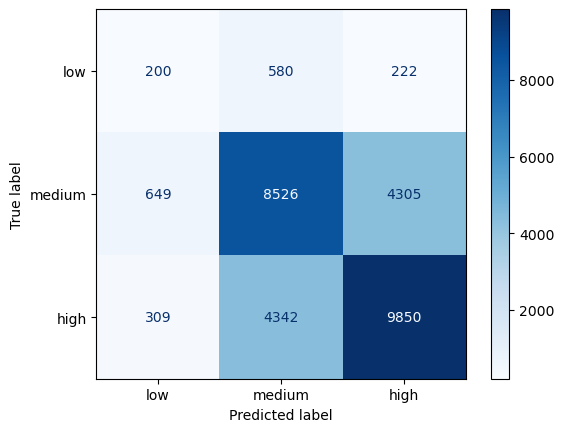

In [60]:
%%time
dtc = DecisionTreeClassifier(random_state = 42)# Initialize the Decision Tree Classifier
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [ ]:
# Definizione dei parametri da cercare
param_distributions = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Creazione del modello di Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Impostazione della ricerca randomizzata
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    n_iter=10,  # Numero di combinazioni casuali da provare
    cv=5,  # Cross-validation con 5 fold
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Allenamento del modello con la ricerca randomizzata
random_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Modello con i migliori parametri
clf = random_search.best_estimator_

Accuracy: 0.6730497188006762

Classification Report:
               precision    recall  f1-score   support

        high       0.68      0.74      0.71     14501
         low       0.40      0.09      0.15      1002
      medium       0.66      0.64      0.65     13480

    accuracy                           0.67     28983
   macro avg       0.58      0.49      0.51     28983
weighted avg       0.67      0.67      0.67     28983

CPU times: total: 984 ms
Wall time: 993 ms


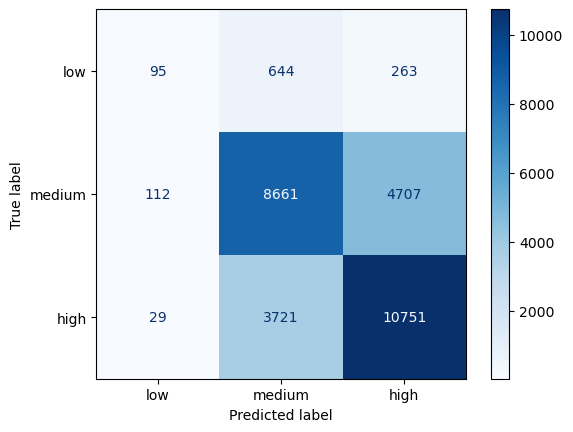

In [62]:
%%time
dtc = DecisionTreeClassifier(random_state=42, criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random')# Initialize the Decision Tree Classifier
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [44]:
# --- Feature importance ---
feature_names = X.columns
importances = dtc.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
24,tvEpisode,0.272536
0,startYear,0.104559
19,genre1,0.057687
2,totalCredits,0.048328
4,ratingCount,0.048264
22,movie,0.041355
6,companiesNumber,0.035174
5,castNumber,0.034459
1,runtimeMinutes,0.034339
21,genre3,0.033017


## SMOTE

Accuracy: 0.625125073318842
Classification Report:
               precision    recall  f1-score   support

        high       0.70      0.71      0.71     14501
         low       0.14      0.45      0.21      1002
      medium       0.67      0.55      0.60     13480

    accuracy                           0.63     28983
   macro avg       0.50      0.57      0.51     28983
weighted avg       0.67      0.63      0.64     28983



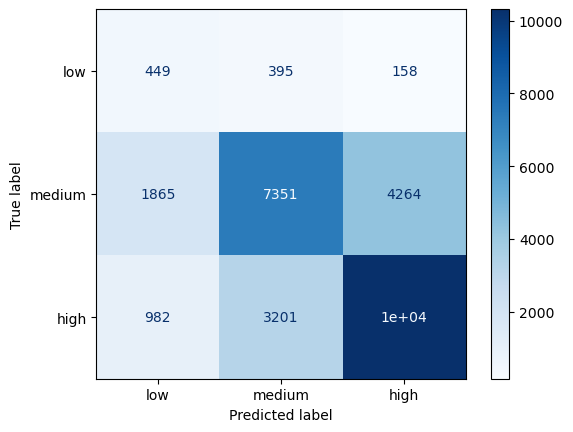

In [50]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random')
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [33]:
print("Class distribution in training set after SMOTE:)")
print(pd.Series(y_train_resampled).value_counts())
print("Class distribution in test set after SMOTE:)")
print(pd.Series(y_test).value_counts())

Class distribution in training set after SMOTE:)
ratingClass
low       58038
medium    58038
high      58038
Name: count, dtype: int64
Class distribution in test set after SMOTE:)
ratingClass
high      14501
medium    13480
low        1002
Name: count, dtype: int64


In [51]:
# --- Feature importance ---
feature_names = X.columns
importances = clf.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
24,tvEpisode,0.144251
19,genre1,0.133198
0,startYear,0.120968
11,totalReviews,0.059381
20,genre2,0.039683
7,writerCredits,0.037849
6,companiesNumber,0.037572
4,ratingCount,0.037126
21,genre3,0.035842
1,runtimeMinutes,0.035557


## ADASYN

Accuracy: 0.6222613256046648
Classification Report:
               precision    recall  f1-score   support

        high       0.70      0.70      0.70     14501
         low       0.12      0.44      0.19      1002
      medium       0.68      0.55      0.61     13480

    accuracy                           0.62     28983
   macro avg       0.50      0.56      0.50     28983
weighted avg       0.67      0.62      0.64     28983



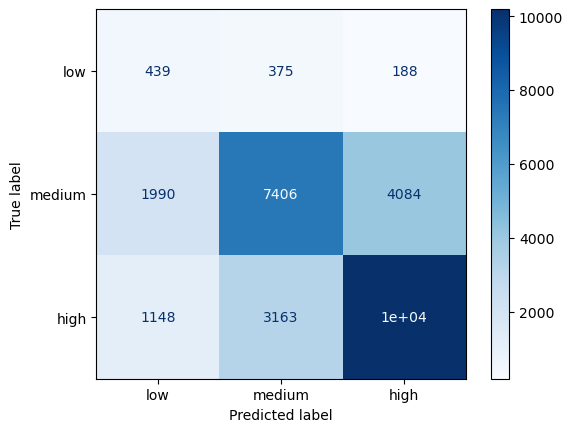

In [52]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42, sampling_strategy='minority')  # Adjust sampling_strategy if needed
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random')
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [41]:
print("Class distribution in training set after ADASYN:)")
print(pd.Series(y_train_resampled).value_counts())
print("Class distribution in test set after ADASYN:)")
print(pd.Series(y_test).value_counts())

Class distribution in training set after ADASYN:)
ratingClass
high      58038
low       57817
medium    53914
Name: count, dtype: int64
Class distribution in test set after ADASYN:)
ratingClass
high      14501
medium    13480
low        1002
Name: count, dtype: int64


In [53]:
# --- Feature importance ---
feature_names = X.columns
importances = clf.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
24,tvEpisode,0.159895
19,genre1,0.147475
0,startYear,0.103323
20,genre2,0.045420
14,Europe,0.044916
3,numRegions,0.044819
7,writerCredits,0.038416
2,totalCredits,0.037867
4,ratingCount,0.036663
1,runtimeMinutes,0.035525


# UnderSampling

## Resample

In [ ]:
from sklearn.utils import resample

# Find the size of the smallest class
min_class_size = df2['ratingClass'].value_counts().min()

# Downsample each class to the same size
balanced_df = (
    df2.groupby('ratingClass', group_keys=False)
       .apply(lambda x: resample(x, replace=False, n_samples=min_class_size, random_state=42))
)

# Define features and target
X_balanced = balanced_df[X.columns]
y_balanced = balanced_df['ratingClass']
# Check the new class distribution
print("Class distribution in balanced dataset:")
print(y_balanced.value_counts())

# train_decision_tree(X_balanced, y_balanced, test_set[feats], test_set['ratingQualityNumeric'])

C:\Users\tanya\AppData\Local\Temp\ipykernel_11008\3393600958.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('ratingClass', group_keys=False)


Class distribution in balanced dataset:
ratingClass
low       4979
medium    4979
high      4979
Name: count, dtype: int64


C:\Users\tanya\AppData\Local\Temp\ipykernel_11008\3393600958.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: resample(x, replace=False, n_samples=min_class_size, random_state=42))


Accuracy: 0.535140562248996
Classification Report:
               precision    recall  f1-score   support

        high       0.55      0.66      0.60       962
         low       0.58      0.57      0.57      1018
      medium       0.47      0.39      0.42      1008

    accuracy                           0.54      2988
   macro avg       0.53      0.54      0.53      2988
weighted avg       0.53      0.54      0.53      2988



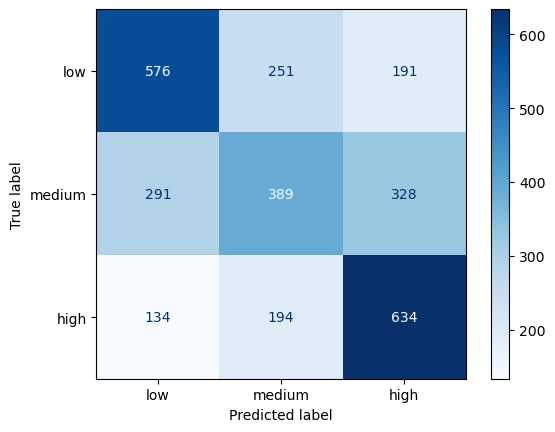

In [56]:
# Scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_balanced), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [57]:
print("Class distribution in training set after Resample:)")
print(pd.Series(y_train).value_counts())
print("Class distribution in test set after Resample:)")
print(pd.Series(y_test).value_counts())

Class distribution in training set after Resample:)
ratingClass
high      4017
medium    3971
low       3961
Name: count, dtype: int64
Class distribution in test set after Resample:)
ratingClass
low       1018
medium    1008
high       962
Name: count, dtype: int64


In [58]:
# --- Feature importance ---
feature_names = X.columns
importances = clf.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
24,tvEpisode,0.260166
0,startYear,0.124677
19,genre1,0.110167
2,totalCredits,0.052509
5,castNumber,0.044873
21,genre3,0.043122
1,runtimeMinutes,0.035618
15,North America,0.031061
4,ratingCount,0.027572
20,genre2,0.026515


## ENN

# Decision Threshold and Class Weights

In [64]:
# Define features (X) and target (y)
X = df2.drop(columns=['ratingClass'])  # Exclude target
y = df2['ratingClass']  # Target variable

# Scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.6730497188006762

Classification Report:
               precision    recall  f1-score   support

        high       0.68      0.74      0.71     14501
         low       0.40      0.09      0.15      1002
      medium       0.66      0.64      0.65     13480

    accuracy                           0.67     28983
   macro avg       0.58      0.49      0.51     28983
weighted avg       0.67      0.67      0.67     28983

CPU times: total: 1.09 s
Wall time: 1.22 s


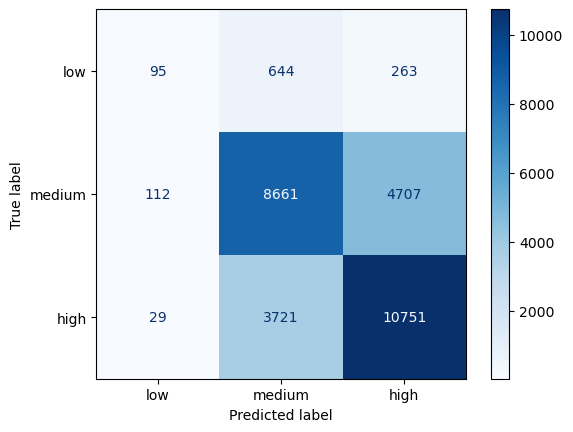

In [65]:
%%time
dtc = DecisionTreeClassifier(random_state=42, criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random')# Initialize the Decision Tree Classifier
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [68]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

print(class_weight_dict)

{'high': 0.6659038586139869, 'low': 9.701546495280176, 'medium': 0.7167403626435588}


Accuracy: 0.5674360832211987
Classification Report:
               precision    recall  f1-score   support

        high       0.72      0.62      0.67     14501
         low       0.10      0.57      0.17      1002
      medium       0.64      0.51      0.57     13480

    accuracy                           0.57     28983
   macro avg       0.49      0.57      0.47     28983
weighted avg       0.66      0.57      0.60     28983



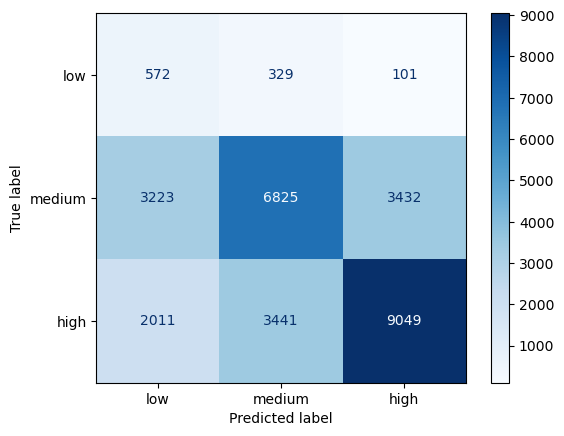

In [78]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight={'high': 0.6, 'low': 9, 'medium': 0.7},criterion='gini', max_features=None, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter = 'random') # change the weights here
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [79]:
# --- Feature importance ---
feature_names = X.columns
importances = clf.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
24,tvEpisode,0.156057
0,startYear,0.116663
19,genre1,0.101416
20,genre2,0.051841
5,castNumber,0.044124
6,companiesNumber,0.043808
7,writerCredits,0.043794
4,ratingCount,0.041709
2,totalCredits,0.039198
1,runtimeMinutes,0.038813


Accuracy: 0.6410654521616119
Classification Report:
               precision    recall  f1-score   support

        high       0.69      0.68      0.68     14501
         low       0.17      0.20      0.19      1002
      medium       0.63      0.63      0.63     13480

    accuracy                           0.64     28983
   macro avg       0.50      0.50      0.50     28983
weighted avg       0.64      0.64      0.64     28983



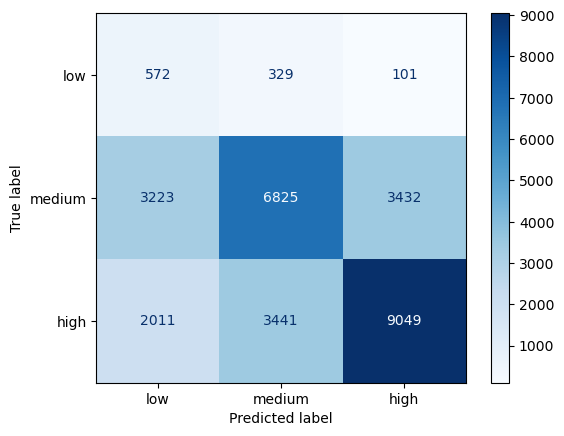

In [80]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Fit on training labels and transform both train & test
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight=None)
clf.fit(X_train, y_train_enc)

# Get predicted probabilities
y_pred_proba = clf.predict_proba(X_test)

# Example thresholds for each class
thresholds = [0.1, 0.6, 0.3]  # [low, medium, high]

# Custom logic for per-class thresholding
y_pred_adjusted = []

for probs in y_pred_proba:
    selected_class = None
    for i, prob in enumerate(probs):
        if prob >= thresholds[i]:
            selected_class = i
            break
    if selected_class is None:
        selected_class = np.argmax(probs)  # fallback
    y_pred_adjusted.append(selected_class)

y_pred_adjusted = np.array(y_pred_adjusted)


# Evaluate the model
accuracy = accuracy_score(y_test_enc, y_pred_adjusted)
report = classification_report(y_test_enc, y_pred_adjusted, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [81]:
# --- Feature importance ---
feature_names = X.columns
importances = clf.feature_importances_

# Convert to DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
4,ratingCount,0.117066
0,startYear,0.108821
24,tvEpisode,0.104282
2,totalCredits,0.098598
1,runtimeMinutes,0.092636
5,castNumber,0.082326
10,totalMedia,0.057491
6,companiesNumber,0.048703
19,genre1,0.039964
20,genre2,0.038479
